Looking at Ruptures in particular

## Setup first

In [1]:
# Load in libraries needed to start
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import ruptures as rpt
import detecta as dta

In [2]:
#os.getcwd()

## Data

This data is from Barchart.com. No claim of accuracy is made, don't trade on this, etc

In [3]:
rbob = pd.read_csv('../1_data/RBY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
corn = pd.read_csv('../1_data/ZCY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
beanoil = pd.read_csv('../1_data/ZLY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
soy = pd.read_csv('../1_data/ZSY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
crude = pd.read_csv('../1_data/CLY00_Barchart_Interactive_Chart_Monthly_Nearby_06_02_2024.csv', header = 1)
ulsd = pd.read_csv('../1_data/HOY00_Barchart_Interactive_Chart_Monthly_Nearby_06_02_2024.csv', header = 1)

In [4]:
rbob.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1978-09-01,RBY00,0.4850,0.485,0.485,0.4850,0.0000,NaN,NaN
1,1978-10-01,RBY00,0.4720,0.490,0.472,0.4900,0.0050,NaN,NaN
2,1978-11-01,RBY00,0.4900,0.570,0.490,0.5500,0.0600,NaN,NaN
3,1978-12-01,RBY00,0.5500,0.550,0.530,0.5375,-0.0125,NaN,NaN
4,1979-01-01,RBY00,0.5325,0.570,0.525,0.5700,0.0325,NaN,NaN


In [5]:
corn.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
636,2024-02-01,ZCY00,438.25,438.25,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.00,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.00,416.50,444.625,17.625,434622.0,1536514.0
639,2024-05-01,ZCY00,449.50,481.50,449.50,472.750,28.125,399802.0,1495984.0
640,Downloaded from Barchart.com as of 05-27-2024 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that every file from Barchart has this line saying that it's downloaded from Barchart, which is 100% fair. To continue to transform the data in Python, we need to make a copy of the dataframe without this in the date column.

In [6]:
## Need to deal with datetimes, last line
commodities_dict = {'corn': corn,
                   'rbob': rbob, 
                   'soy': soy,
                   'crude': crude,
                   'beanoil': beanoil,
                   'soy': soy, 
                   'ulsd': ulsd}

In [7]:
for commodity in commodities_dict.keys():
    df = commodities_dict[commodity]
    df.drop(df.tail(1).index,inplace=True)

In [8]:
corn.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
635,2024-01-01,ZCY00,466.25,470.375,431.25,439.250,-27.000,316074.0,1497444.0
636,2024-02-01,ZCY00,438.25,438.250,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.000,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.000,416.50,444.625,17.625,434622.0,1536514.0
639,2024-05-01,ZCY00,449.50,481.500,449.50,472.750,28.125,399802.0,1495984.0


In [9]:
for commodity in commodities_dict.keys():
    df = commodities_dict[commodity]
    df['Date Time'] = pd.to_datetime(df['Date Time'])

## Basic plots

First use your eyeballs to look at the data

<Axes: xlabel='Date Time', ylabel='Close'>

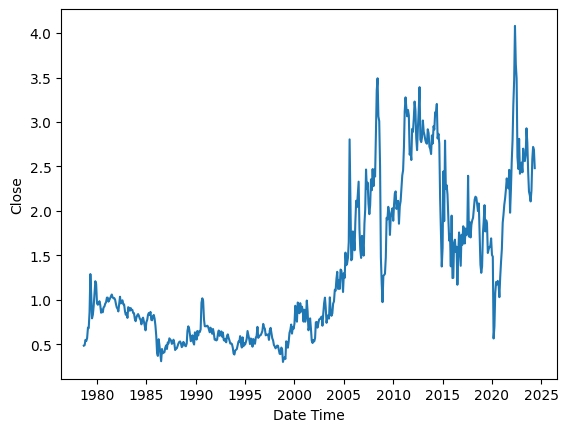

In [10]:
sns.lineplot(data = rbob, x = 'Date Time', y = 'Close')


<Axes: xlabel='Date Time', ylabel='Close'>

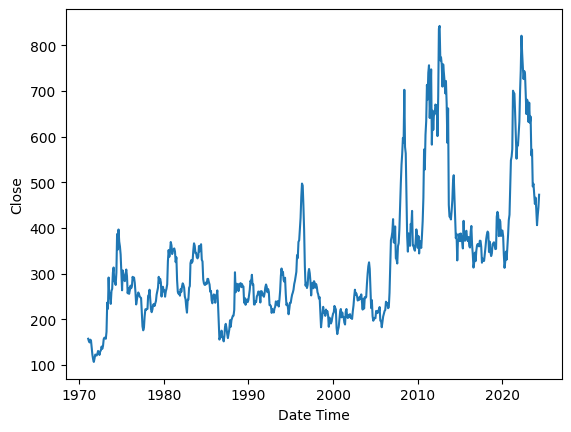

In [11]:
sns.lineplot(data = corn, x = 'Date Time', y = 'Close')

Let's scale corn and rbob to look at them on the same scale. I'm just going to scale by a nice number picked because of the illustrative effect.

In [12]:
corn_and_gas = corn.merge(rbob, on = 'Date Time', suffixes = ['_corn','_rbob'])
corn_and_crude = corn.merge(crude, on = 'Date Time', suffixes = ['_corn','_crude'])

In [13]:
corn_and_gas['scaled_corn'] = corn_and_gas['Close_corn']/(200)
corn_and_gas['scaled_gas'] = corn_and_gas['Close_rbob']

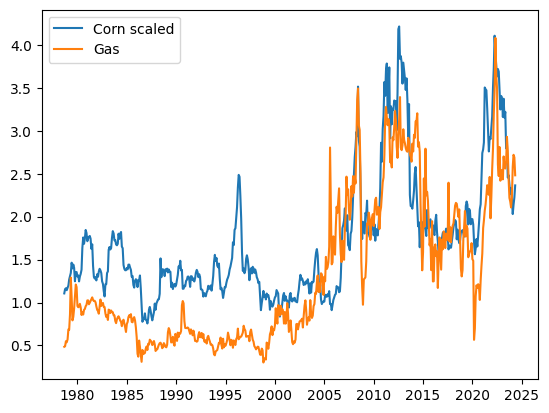

In [14]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['scaled_corn'], label = 'Corn scaled')
plt.plot(corn_and_gas['Date Time'], corn_and_gas['scaled_gas'], label = 'Gas')
plt.legend()

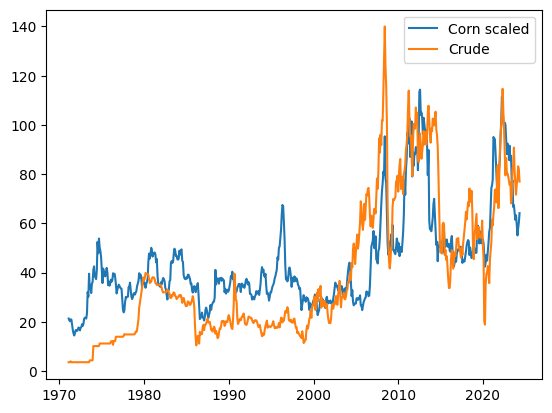

In [15]:
plt.plot(corn_and_crude['Date Time'], corn_and_crude['Close_corn']/7.37, label = 'Corn scaled')
plt.plot(corn_and_crude['Date Time'], corn_and_crude['Close_crude'], label = 'Crude')
plt.legend()

Well that's somewhat evocative, isn't it? But correlation isn't causation, and making graphs lie on top of each other doesn't prove anything either. 

We got "Change" for free from Barchart. What if we plot those? Convert to the same scale by doing change over close

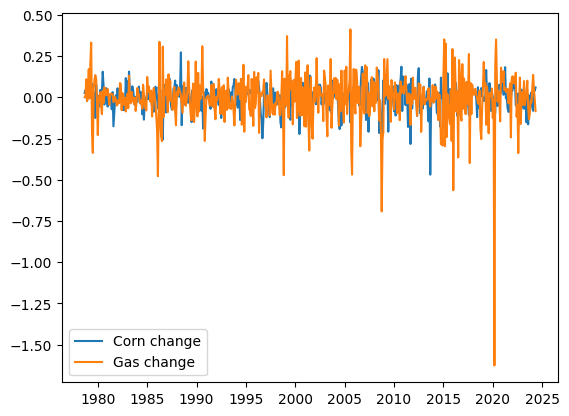

In [16]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Change_corn']/corn_and_gas['Close_corn'], label = 'Corn change')
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Change_rbob']/corn_and_gas['Close_rbob'], label = 'Gas change')
plt.legend()

That's too ugly to see anything. Fine. How about correlations? Let's do a rolling 12-month correlation.

Text(0.5, 1.0, 'Correlation on monthly price, rolling 24-month')

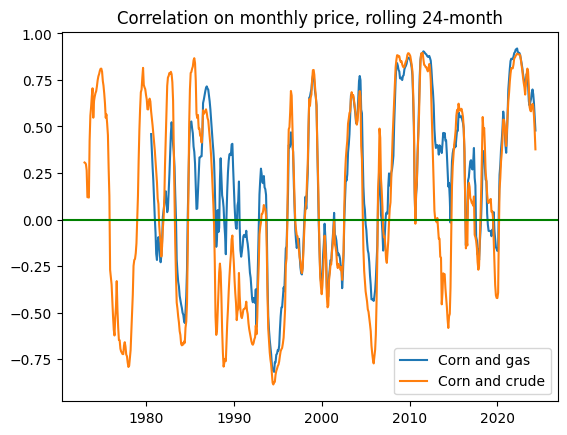

In [17]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].rolling(24).corr(corn_and_gas['Close_rbob']), label = 'Corn and gas')
plt.plot(corn_and_crude['Date Time'], corn_and_crude['Close_corn'].rolling(24).corr(corn_and_crude['Close_crude']), label = 'Corn and crude')

plt.legend()
plt.axhline(0, color = 'green')
plt.title('Correlation on monthly price, rolling 24-month')

Text(0.5, 1.0, 'Correlation on monthly price, rolling 36-month')

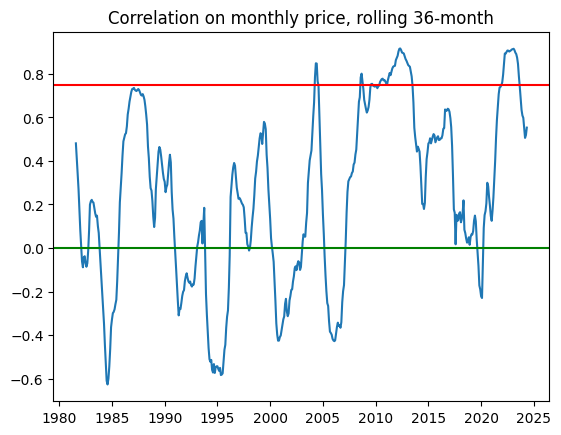

In [18]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].rolling(36).corr(corn_and_gas['Close_rbob']))
plt.axhline(0, color = 'green')
plt.axhline(0.75, color = 'red')
plt.title('Correlation on monthly price, rolling 36-month')

Text(0.5, 1.0, 'Correlation in monthly % change in price, rolling 24-month')

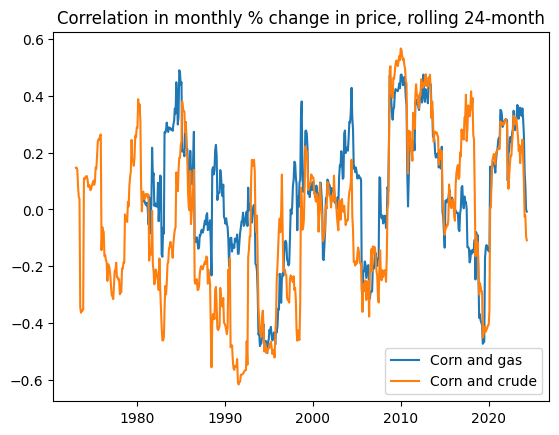

In [19]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].pct_change().rolling(24).corr(corn_and_gas['Close_rbob'].pct_change()), label = 'Corn and gas')
plt.plot(corn_and_crude['Date Time'], corn_and_crude['Close_corn'].pct_change().rolling(24).corr(corn_and_crude['Close_crude'].pct_change()), label = "Corn and crude")
plt.legend()

plt.title("Correlation in monthly % change in price, rolling 24-month")

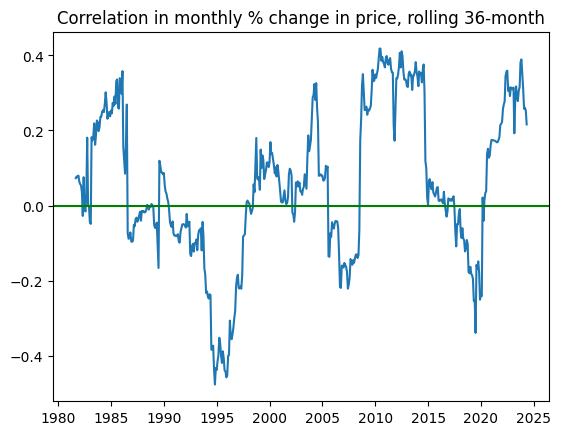

In [78]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].pct_change().rolling(36).corr(corn_and_gas['Close_rbob'].pct_change()))
plt.title("Correlation in monthly % change in price, rolling 36-month")
plt.axhline(0, color = 'green')

In [21]:
beanoil_and_ulsd = beanoil.merge(ulsd, on = 'Date Time', suffixes = ['_bo','_ulsd'])

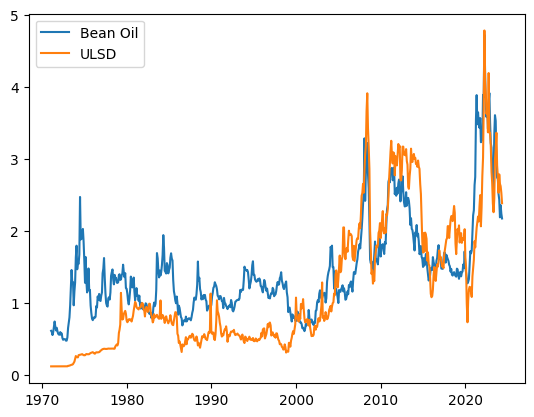

In [22]:
# Let's repeat the process for bean oil and ULSD
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['Close_bo']/20, label = 'Bean Oil')
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['Close_ulsd'], label = 'ULSD')
plt.legend()

Again, sort of suggestive, but.... still some significant differences. Note that all I did was scale to make the charts line up, there is no science here yet.

Text(0.5, 1.0, 'Correlation on monthly price, rolling 36-month')

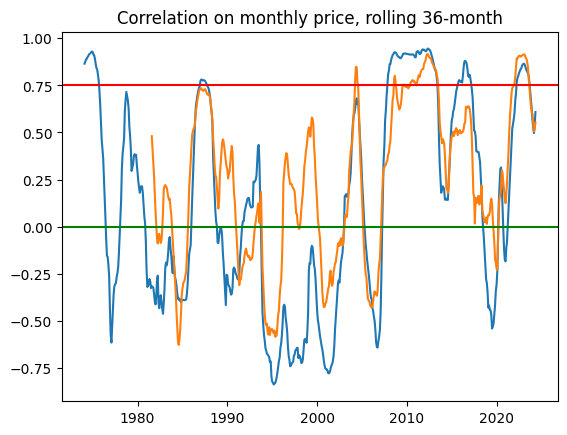

In [23]:
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['Close_bo'].rolling(36).corr(beanoil_and_ulsd['Close_ulsd']), label = 'BO and HO')
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].rolling(36).corr(corn_and_gas['Close_rbob']), label = 'Corn and Rbob')
plt.axhline(0, color = 'green')
plt.axhline(0.75, color = 'red')
plt.title('Correlation on monthly price, rolling 36-month')

Text(0.5, 1.0, 'Correlation in monthly % change in price, rolling 24-month')

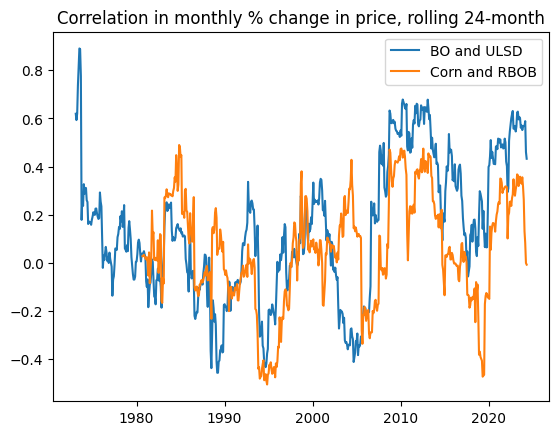

In [24]:
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['Close_bo'].pct_change().rolling(24).corr(beanoil_and_ulsd['Close_ulsd'].pct_change()), label = "BO and ULSD")
plt.plot(corn_and_gas['Date Time'], corn_and_gas['Close_corn'].pct_change().rolling(24).corr(corn_and_gas['Close_rbob'].pct_change()), label = 'Corn and RBOB')
plt.legend()
plt.title("Correlation in monthly % change in price, rolling 24-month")

Text(0.5, 1.0, 'Correlation on monthly price, rolling 36-month')

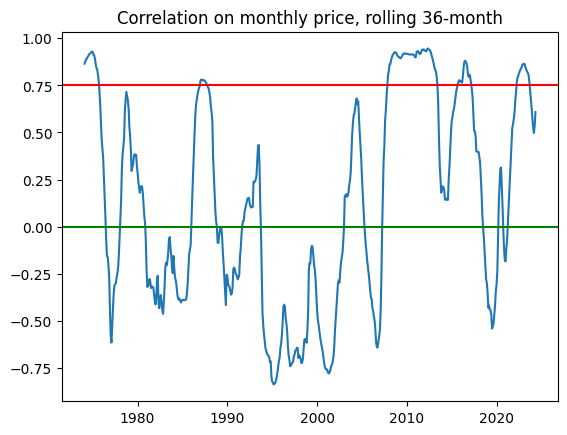

In [25]:
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['Close_bo'].rolling(36).corr(beanoil_and_ulsd['Close_ulsd']))
plt.axhline(0, color = 'green')
plt.axhline(0.75, color = 'red')
plt.title('Correlation on monthly price, rolling 36-month')

Worth looking at commodity supercycles here?
https://www.visualcapitalist.com/what-is-a-commodity-super-cycle/

## Regime change/changepoint detection first pass

Ruptures is what we'll concentrate on. What kernel? what methods?

In [25]:
corn

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1971-02-01,ZCY00,156.50,160.000,155.50,157.000,0.000,13646.0,72173.0
1,1971-03-01,ZCY00,156.50,158.000,152.00,152.000,-5.000,15845.0,61893.0
2,1971-04-01,ZCY00,152.75,155.000,146.25,149.000,-3.000,15265.0,53894.0
3,1971-05-01,ZCY00,149.75,155.000,148.50,155.000,6.000,17052.0,45821.0
4,1971-06-01,ZCY00,154.00,163.750,151.75,153.500,-1.500,28895.0,51193.0
...,...,...,...,...,...,...,...,...,...
635,2024-01-01,ZCY00,466.25,470.375,431.25,439.250,-27.000,316074.0,1497444.0
636,2024-02-01,ZCY00,438.25,438.250,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.000,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.000,416.50,444.625,17.625,434622.0,1536514.0


So, in particular, Pelt is for an unknown number of changepoints -- it's a penalized changepoint detection algorithm. I'm sticking with the Gaussian cost function rbf, but let's play with the penalty.  https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/

In [26]:
algo = rpt.Pelt(model = "rbf").fit(np.array(corn['Close']))


In [27]:
result = algo.predict(pen=10)

In [28]:
corn.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1971-02-01,ZCY00,156.50,160.00,155.50,157.0,0.0,13646.0,72173.0
1,1971-03-01,ZCY00,156.50,158.00,152.00,152.0,-5.0,15845.0,61893.0
2,1971-04-01,ZCY00,152.75,155.00,146.25,149.0,-3.0,15265.0,53894.0
3,1971-05-01,ZCY00,149.75,155.00,148.50,155.0,6.0,17052.0,45821.0
4,1971-06-01,ZCY00,154.00,163.75,151.75,153.5,-1.5,28895.0,51193.0


In [29]:
corn.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
635,2024-01-01,ZCY00,466.25,470.375,431.25,439.250,-27.000,316074.0,1497444.0
636,2024-02-01,ZCY00,438.25,438.250,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.000,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.000,416.50,444.625,17.625,434622.0,1536514.0
639,2024-05-01,ZCY00,449.50,481.500,449.50,472.750,28.125,399802.0,1495984.0


In [30]:
# Let's print the changepoint datetimes detected by ruptures

for ix in result:
    print(corn.loc[ix-1, 'Date Time'])
#2005 -- first Renewable Fuel Standard passed
# We'd expect this to have interesting dates in corn markets as well
#https://www.bls.gov/opub/ted/2012/ted_20121128.htm

1973-02-01 00:00:00
1998-07-01 00:00:00
2006-11-01 00:00:00
2010-08-01 00:00:00
2013-07-01 00:00:00
2021-01-01 00:00:00
2024-05-01 00:00:00


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

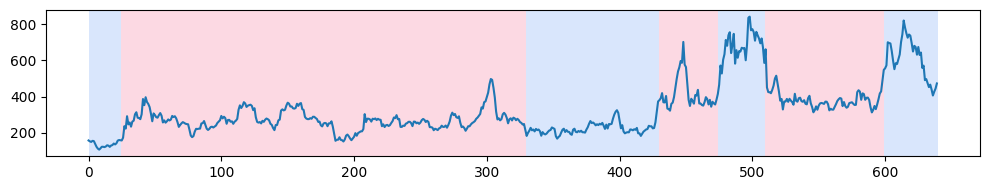

In [31]:
rpt.display(corn['Close'], result)
#plt.plot(corn['Date Time'],corn['Close'])

In [35]:
result_15 = algo.predict(pen=15)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

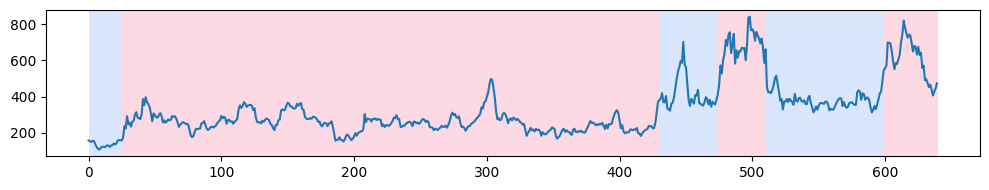

In [36]:
rpt.display(corn['Close'], result_15)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

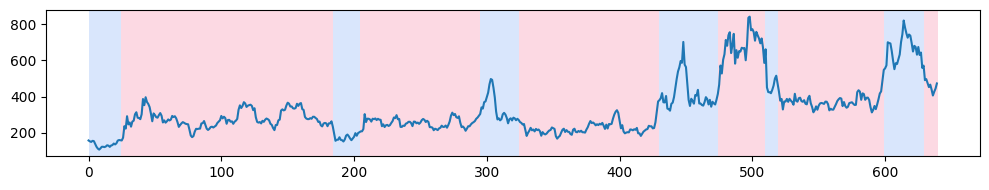

In [38]:
result_5 = algo.predict(pen=5)
rpt.display(corn['Close'], result_5)

AttributeError: module 'ruptures' has no attribute 'Opt'

In [44]:
algo_dyn = rpt.Dynp(model="l2").fit(np.array(corn['Close']))
result_dyn = algo_dyn.predict(n_bkps=5)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

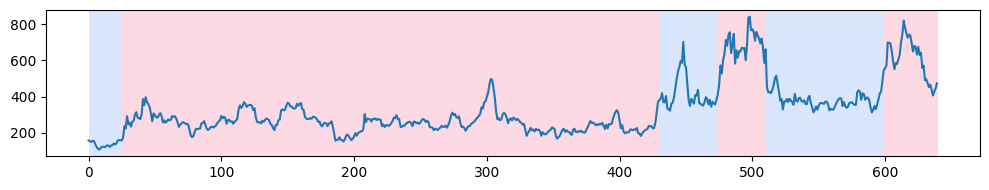

In [45]:
rpt.display(corn['Close'], result_dyn)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

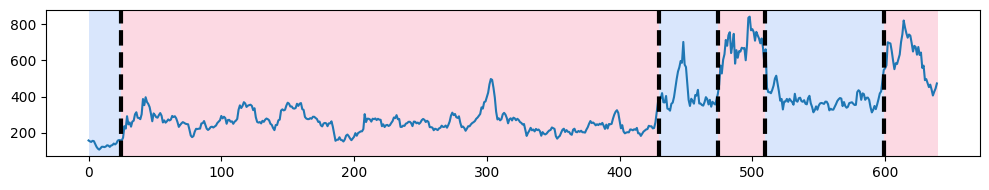

In [46]:
rpt.display(corn['Close'], result_15, result_dyn)

In [63]:
corr_corn_rbob = corn_and_gas['Close_corn'].pct_change().rolling(36).corr(corn_and_gas['Close_rbob'].pct_change()).dropna()
algo2 = rpt.Pelt(model = "rbf").fit(np.array(corr_corn_rbob))

In [64]:
result2 = algo2.predict(pen=10)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

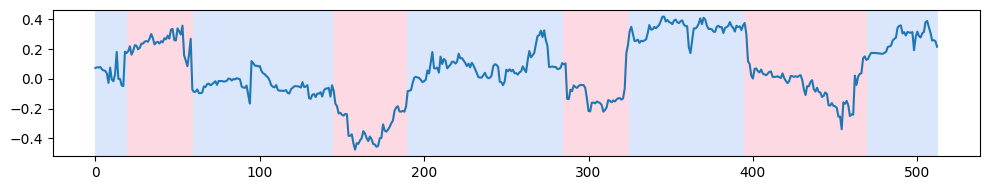

In [65]:
rpt.display(corr_corn_rbob, result2)
# It would be nice to display this with the dates on the axes, no?


In [66]:
result2
# 513 is the lenght of the series, so these #s are NOT the pandas index but instead index of np.array

[20, 60, 145, 190, 285, 325, 395, 470, 513]

To get back to the date, we need to bring the correlation back to dates from the original time series



In [67]:
corr_corn_rbob

36     0.072953
37     0.077768
38     0.075578
39     0.079918
40     0.063952
         ...   
544    0.310965
545    0.257640
546    0.260488
547    0.252961
548    0.216262
Length: 513, dtype: float64

In [68]:
corn_and_gas.shape

(549, 20)

In [69]:

for ix in result2:
    print(corn_and_gas.loc[ix-1+36, 'Date Time'])

1983-04-01 00:00:00
1986-08-01 00:00:00
1993-09-01 00:00:00
1997-06-01 00:00:00
2005-05-01 00:00:00
2008-09-01 00:00:00
2014-07-01 00:00:00
2020-10-01 00:00:00
2024-05-01 00:00:00


 How about look at the corn/RBOB spread? the difference? Here, units will matter
A bushel of field corn can be used to produce about 2.77 gallons of ethanol
Corn contracts are priced in cents per bushel
RBOB is in dollars and cents per gallon
so take the price of the corn future, divide by 100 to get dollars per bushel, then multiply by 1/2.77 to get dollars per gallon of ethanol, NOT TAKING INTO ACCOUNT any manufacturing costs at all


In [49]:
corn_and_gas['corn_gas_spread'] = corn_and_gas['Close_rbob']-corn_and_gas['Close_corn']/(100*2.77)

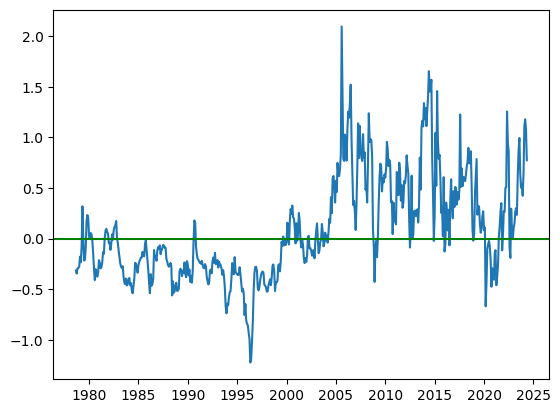

In [77]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['corn_gas_spread'])
plt.axhline(0, color = 'green')

In [53]:
algo_co_ga = rpt.Pelt(model = "rbf").fit(np.array(corn_and_gas['corn_gas_spread']))

In [54]:
result_co_ga = algo_co_ga.predict(pen=10)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

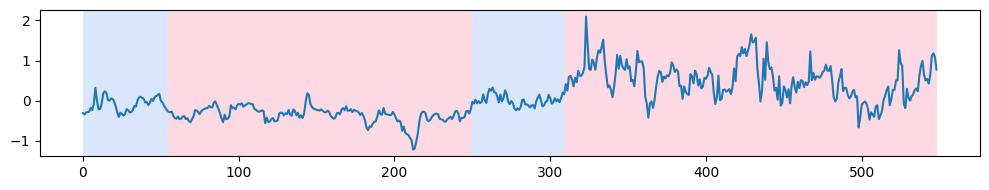

In [55]:
rpt.display(corn_and_gas['corn_gas_spread'], result_co_ga)

In [59]:

for ix in result_co_ga:
    print(corn_and_gas.loc[ix-1, 'Date Time'])

1983-03-01 00:00:00
1999-06-01 00:00:00
2004-06-01 00:00:00
2024-05-01 00:00:00


,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1971-02-01,ZCY00,156.50,160.00,155.50,157.0,0.0,13646.0,72173.0
1,1971-03-01,ZCY00,156.50,158.00,152.00,152.0,-5.0,15845.0,61893.0
2,1971-04-01,ZCY00,152.75,155.00,146.25,149.0,-3.0,15265.0,53894.0
3,1971-05-01,ZCY00,149.75,155.00,148.50,155.0,6.0,17052.0,45821.0
4,1971-06-01,ZCY00,154.00,163.75,151.75,153.5,-1.5,28895.0,51193.0


In [75]:
# BO-HO: the cost of a pound of soybean oil * 7.37 minus the cost of a gallon of blendstock heating oil.
# HO is dollars & cents per gallon, BO is cents per gallon
beanoil_and_ulsd['bo_ho'] = beanoil_and_ulsd['Close_bo']*7.37/100-beanoil_and_ulsd['Close_ulsd']

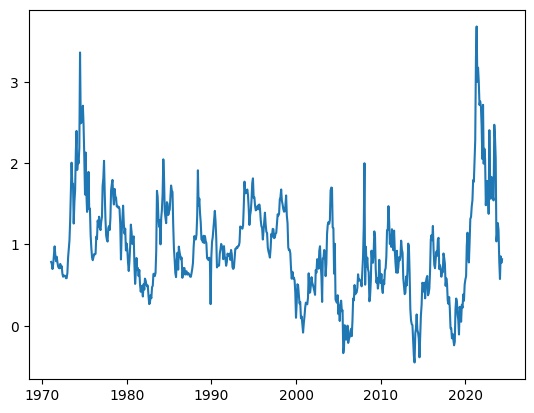

In [76]:
plt.plot(beanoil_and_ulsd['Date Time'], beanoil_and_ulsd['bo_ho'])

In [164]:
# Make a dataframe of all the commodities, crue, rbob, corn, soy, beanoil
crbu = corn_and_gas.merge(beanoil_and_ulsd, on = 'Date Time')
crbu.head()

,Date Time,Symbol_corn,Open_corn,High_corn,Low_corn,Close_corn,Change_corn,Volume_corn,Open Interest_corn,Symbol_rbob,...,Volume_bo,Open Interest_bo,Symbol_ulsd,Open_ulsd,High_ulsd,Low_ulsd,Close_ulsd,Change_ulsd,Volume_ulsd,Open Interest_ulsd
0,1978-09-01,ZCY00,214.00,221.25,212.00,221.25,6.00,39771.0,114110.0,RBY00,...,20426.0,51302.0,HOY00,0.3975,0.3975,0.3975,0.3975,0.0315,NaN,NaN
1,1978-10-01,ZCY00,224.50,234.25,219.50,231.25,10.00,49621.0,140100.0,RBY00,...,25947.0,53980.0,HOY00,0.3975,0.4270,0.3550,0.4100,0.0125,NaN,NaN
2,1978-11-01,ZCY00,229.75,236.00,228.25,233.25,2.00,54467.0,147236.0,RBY00,...,25726.0,57406.0,HOY00,0.4100,0.4238,0.4100,0.4238,0.0138,NaN,5.0
3,1978-12-01,ZCY00,234.00,234.00,227.00,228.75,-4.50,34309.0,130630.0,RBY00,...,20170.0,53960.0,HOY00,0.4236,0.4275,0.4075,0.4100,-0.0138,3.0,31.0
4,1979-01-01,ZCY00,227.75,235.00,225.50,234.50,5.75,31265.0,127928.0,RBY00,...,19544.0,50025.0,HOY00,0.4100,0.4450,0.3620,0.4450,0.0350,16.0,174.0


In [174]:
close_cols = [ 'Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']

In [166]:
crbu = crbu[['Date Time', 'Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']]

In [168]:
# Compute correlations over chunks of time -- a correlation matrix for each chunk
# np.log(df.price / df.price.shift(1))
crbu_logret = np.log(crbu[['Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']]/crbu[['Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']].shift(1))

In [170]:
crbu_logret['Date'] = crbu['Date Time']
crbu_logret.dropna(inplace = True)

In [171]:
crbu_logret.head()

,Close_corn,Close_rbob,Close_ulsd,Close_bo,Date
1,0.044206,0.010257,0.030962,-0.000742,1978-10-01
2,0.008611,0.115513,0.033104,-0.049440,1978-11-01
3,-0.019481,-0.022990,-0.033104,-0.003124,1978-12-01
4,0.024826,0.058708,0.081917,0.006626,1979-01-01
5,0.022141,0.187425,0.273538,0.075910,1979-02-01


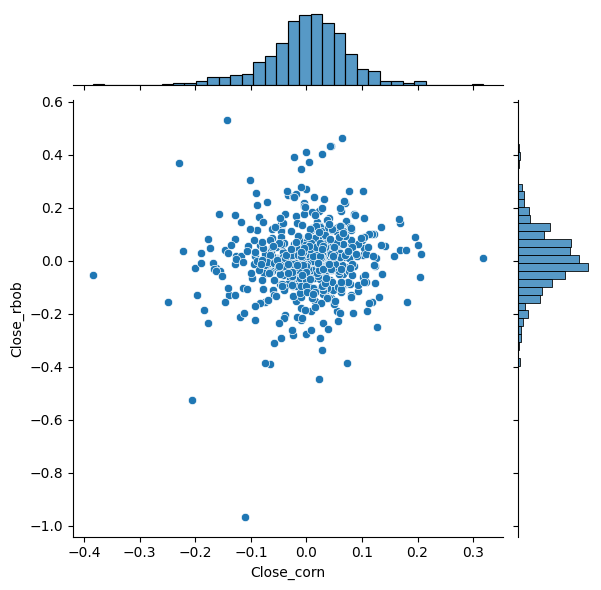

In [182]:
sns.jointplot(data = crbu_logret, x = 'Close_corn', y = 'Close_rbob')